In [2]:
from pre_processing_functions import preprocess
import pandas as pd
from sklearn.cluster import KMeans
import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


In [3]:
!pip install minisom

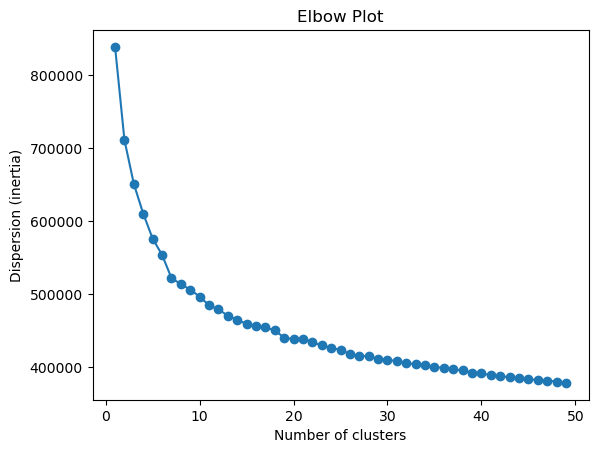

In [3]:
data = preprocess('customer_info.csv')  
data = data.select_dtypes(include=['int64', 'float64'])

dispersion = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    dispersion.append(kmeans.inertia_)

plt.plot(range(1, 50), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.title('Elbow Plot')
plt.show()


By developing the elbow graph we were able to detect that the right number of clusters to use on our Kmeans method is 7-10 clusters

In [29]:
def kmeans_clustering(path, n_clusters = 10, random_state = 42):
    data = preprocess(path)  
    data= data[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(data)

    # Add cluster column to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['Kmeans_cluster'] = cluster_labels

    return data_with_clusters

In [30]:
kmeans_clustering('customer_info.csv', n_clusters=9)

,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,Kmeans_cluster
0,-0.746485,0.522647,-0.041676,-0.020749,1.722306,0.645623,1.283549,1.653328,-0.528767,0.045856,0.731036,2.001266,6
1,-0.702608,-1.013591,0.175439,0.077044,-1.336103,-1.247725,-0.322975,-0.737103,-0.659575,-1.005829,-0.613579,-0.703009,1
2,-0.349564,0.156665,0.175439,1.252036,1.786319,1.770706,0.768037,1.772232,0.432567,-0.194440,-0.839900,1.422396,5
3,-0.459509,3.493829,0.175439,-1.054979,-0.742202,1.741682,0.048194,-0.059196,-1.189035,0.879090,-0.320693,0.575690,0
4,1.359034,-0.140867,0.175439,-0.714187,0.883022,-0.491410,0.130676,1.032558,0.694183,-0.890362,-1.159413,0.774406,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,2.022820,0.425769,0.609668,0.108160,0.178877,1.176580,-0.424203,1.333678,0.698335,-0.057128,-0.400571,0.074578,2
34056,-0.325239,0.024460,-0.041676,-0.352651,0.961260,-0.240443,0.537462,-0.394289,0.492780,-0.419132,0.005476,1.940787,3
34057,-0.399027,1.401167,0.826783,-0.500821,-0.767096,-0.598967,-0.757880,1.001673,-0.713559,1.269181,-1.385734,0.636169,0
34058,0.758270,0.274519,-0.910135,-0.807534,0.025956,-0.540921,0.595574,0.124564,0.781388,0.011528,0.384897,-0.029100,3


In [31]:
def umap_kmeans(df, n_neighbors=5, min_dist=0.01):

    # Select only numeric columns (exclude 'cluster' since it is our 'target')
    features = df.select_dtypes(include='number').drop(columns=['Kmeans_cluster'], errors='ignore')
    features_scaled = features.values

    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['Kmeans_cluster'], palette='tab10', s=70)
    plt.title("UMAP clusters - Kmeans")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


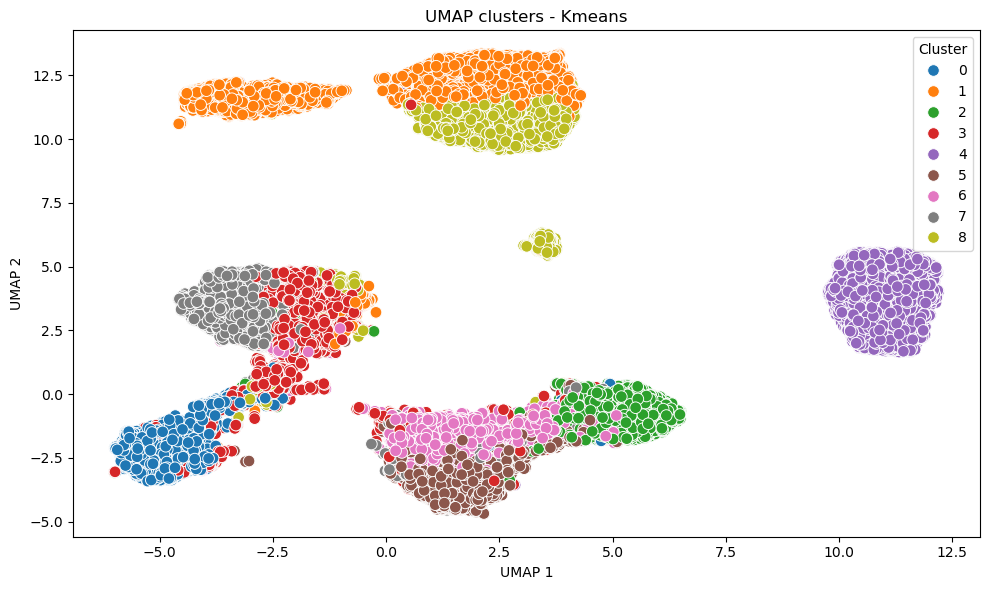

In [32]:
umap_kmeans(kmeans_clustering('customer_info.csv', n_clusters=9))

In [33]:
def hierarchical_clustering(path, n_clusters= 10, linkage= 'ward') :
   
    data = preprocess(path) 
    data= data[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
    
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = model.fit_predict(data)

    # Add the cluster column to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['hierarchical_cluster'] = cluster_labels

    return data_with_clusters

In [34]:
def umap_hierarchical(df, n_neighbors=5, min_dist=0.01):

    # Select only numeric columns (exclude'cluster' since it is our 'target')
    features = df.select_dtypes(include='number').drop(columns=['hierarchical_cluster'], errors='ignore')
    features_scaled = features.values

    reduce = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reduce.fit_transform(features_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['hierarchical_cluster'], palette='tab10', s=70)
    plt.title("UMAP clusters - Hierarchical Clustering")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


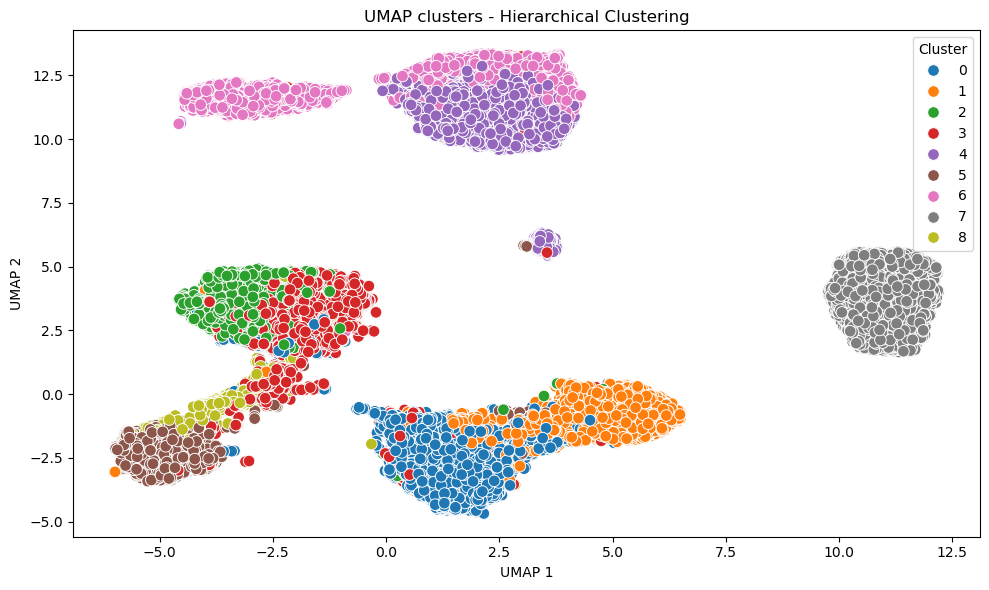

In [35]:
umap_hierarchical(hierarchical_clustering('customer_info.csv', n_clusters=9, linkage='ward'))

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris  # You can replace this with your own data
import pandas as pd

# Suponha que seu DataFrame se chame df
df = preprocess('customer_info.csv')

# Se quiser selecionar apenas colunas numéricas:
X = df[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']].values

# Criar a matriz de ligação
linked = linkage(X, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

KeyboardInterrupt: 